# Análisis de Tendencias de Ventas de Videojuegos para Planificación de Campañas Publicitarias

# Introducción

## Descripción del Proyecto:

En este proyecto, abordaremos la tarea de analizar datos de ventas de videojuegos para la tienda en línea "Ice", que opera a nivel mundial. La tienda Ice vende una amplia variedad de videojuegos y busca identificar patrones que permitan determinar si un juego tendrá éxito o no. Esto es esencial para tomar decisiones informadas sobre la selección de proyectos prometedores y planificación de campañas publicitarias efectivas.

### Contenido

A lo largo de este proyecto, seguiremos una serie de pasos para lograr nuestros objetivos:

1. [Carga y Preparación de Datos](#carga-y-preparacion-de-datos): Comenzaremos por abrir el archivo de datos, estudiar su estructura y realizar las transformaciones necesarias, como cambiar los nombres de las columnas y tratar los valores ausentes.

2. [Análisis de Datos](#analisis-de-datos): Realizaremos un análisis exhaustivo de los datos, investigando aspectos como las ventas por plataforma, la influencia de las reseñas en las ventas y la distribución de géneros de juegos.

3. [Perfil de Usuario por Región](#perfil-de-usuario-por-region): Crearemos perfiles de usuario para diferentes regiones (Norteamérica, Europa y Japón), identificando las plataformas y géneros más populares y evaluando la influencia de las clasificaciones de ESRB en las ventas regionales.

4. [Pruebas de Hipótesis](#pruebas-de-hipotesis): Formularemos y probaremos hipótesis.

5. [Conclusiones Generales](#conclusiones-generales): Resumiremos los hallazgos clave y proporcionaremos recomendaciones basadas en el análisis de datos.

{[]


### Carga y preparación de Datos <a id='carga-y-preparacion-de-datos'></a>

In [46]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr
import scipy.stats as stats
from datetime import datetime
from scipy import stats




In [47]:
# Cargar el archivo de datos
data = pd.read_csv("/datasets/games.csv")

#### Verificación

In [48]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


El conjunto de datos contiene información sobre videojuegos, incluyendo detalles como el nombre, plataforma, año de lanzamiento, género, ventas en diferentes regiones, puntuaciones de críticos y usuarios, y clasificación de contenido. Es importante destacar que se observan valores faltantes en algunas columnas, como las puntuaciones de críticos y usuarios, lo que requerirá un proceso de limpieza y manejo de datos para abordar estos valores ausentes. Además, hay una amplia variedad de plataformas y géneros de juegos, y el rango de años de lanzamiento abarca desde 1985 hasta 2016.

#### Preparación

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Convertiremos los nombres de las columnas a minúsculas:

In [50]:
data.columns = data.columns.str.lower()

Trataremos los valores ausentes:

In [51]:
data = data.dropna(subset=["name", "genre"])

Convertiremos year_of_realease en formato Fecha:

In [52]:
data.loc[:, 'year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')

Convertiremos user_scoe en data numérica:

In [53]:
data.loc[:, 'year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')

Eliminar filas con valores faltantes en "Name", "Year_of_Release" y "Genre" si son insustanciales:

In [54]:
data = data.dropna(subset=["name", "year_of_release", "genre"])

Imputar valores para las puntuaciones en "Critic_Score" y "User_Score" utilizando la media:

Verificamos nuevamente:

In [55]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       9839 non-null   object        
 10  rating           9768 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.5+ MB


### Análisis de Datos <a id='analisis-de-datos'></a>

#### Ventas por Plataforma:

Calcularemos las ventas totales por plataforma en diferentes regiones. A continuación se muestra un código para calcular las ventas totales en Norteamérica (NA_sales), Europa (EU_sales), Japón (JP_sales) y otras regiones (Other_sales) por plataforma:

In [57]:
# Calcular las ventas totales por plataforma en diferentes regiones
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


In [58]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Ver resultados:

In [59]:
sales_by_platform = data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
sales_by_platform.head()

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
2600,80.78,4.86,0.00,0.84
3DO,0.00,0.00,0.10,0.00
3DS,82.65,61.27,100.62,13.27
DC,5.43,1.69,8.56,0.27
DS,380.31,188.41,175.02,59.04


In [60]:
top_platforms = sales_by_platform.sum(axis=1).sort_values(ascending=False)
top_platforms.head()

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
dtype: float64

En función de los datos de ventas totales por plataforma, se destaca que la plataforma "PS2" lidera con ventas acumulativas de 1233.56 millones de dólares, seguida de cerca por "X360" (961.24 millones), "PS3" (931.34 millones), "Wii" (891.18 millones) y "DS" (802.78 millones). Estos números representan ventas combinadas en todas las regiones. Además, se observa que algunas plataformas muestran preferencias regionales, como "3DS" con ventas notables en Japón y "DS" con ventas destacadas en Norteamérica y Europa.

Estos primeros datos proporcionan una visión general de las plataformas más exitosas en términos de ventas totales y revelan diferencias regionales en las preferencias de las plataformas.

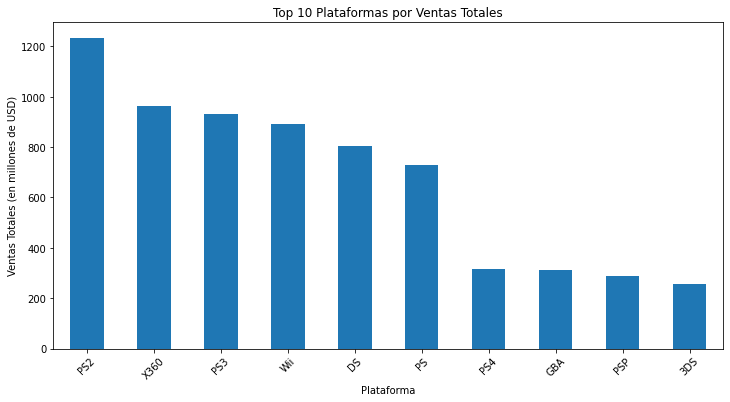

In [61]:
top_platforms[:10].plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Plataformas por Ventas Totales')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones de USD)')
plt.xticks(rotation=45)
plt.show()

Claramente, el gráfico destaca a "PS2" como la plataforma líder en ventas totales, seguida de cerca por "X360", "PS3", "Wii" y "DS". Estas cinco plataformas tienen ventas acumuladas significativas.
Las plataformas "PS4", "GBA", "PSP" y "3DS" tienen ventas mucho más bajas en comparación con las cinco principales.
Las diferencias entre las ventas de estas plataformas sugieren que algunas plataformas han tenido un éxito notable en comparación con otras.

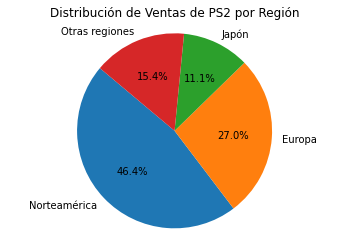

In [62]:
platform_sales = data[data['platform'] == 'PS2'][['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
labels = ['Norteamérica', 'Europa', 'Japón', 'Otras regiones']
plt.pie(platform_sales, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Ventas de PS2 por Región')
plt.axis('equal')  
plt.show()

La mayoría de las ventas de la plataforma "PS2" provienen de Norteamérica (46.4%) y Europa (27%). Esto indica que "PS2" ha sido particularmente popular en estas dos regiones.
Japón contribuye significativamente con un 11.1% de las ventas totales de "PS2", lo que sugiere que la plataforma también tuvo cierto éxito en su país de origen.
Las "Otras regiones" representan el 15.4% de las ventas totales de "PS2", lo que incluye ventas en otras partes del mundo.

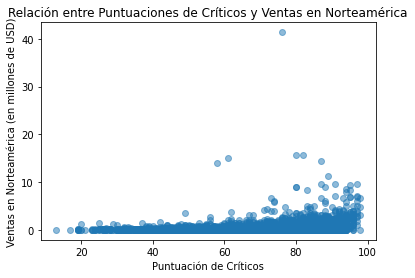

In [63]:
plt.scatter(data['critic_score'], data['na_sales'], alpha=0.5)
plt.title('Relación entre Puntuaciones de Críticos y Ventas en Norteamérica')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas en Norteamérica (en millones de USD)')
plt.show()

El gráfico de dispersión muestra que la mayoría de los juegos tienen puntuaciones de críticos en un rango similar y tienen ventas en Norteamérica en un rango cercano a cero o moderado.
Hay una concentración de puntos en la parte inferior del gráfico, lo que sugiere que la mayoría de los juegos no tienen altas puntuaciones de críticos ni ventas excepcionales en Norteamérica.
Sin embargo, hay algunos puntos que se destacan en el rango de puntuaciones de críticos de alrededor de 70, con ventas en Norteamérica que varían considerablemente. Esto podría indicar que las altas puntuaciones de críticos no garantizan automáticamente altas ventas en Norteamérica.
También se observan algunos puntos aislados con altas puntuaciones de críticos y ventas notables, lo que podría representar juegos excepcionales.

#### Influencia de las Reseñas en las Ventas

Para visualizar cómo las puntuaciones de críticos y usuarios se correlacionan con las ventas globales, crearemos gráficos de dispersión.

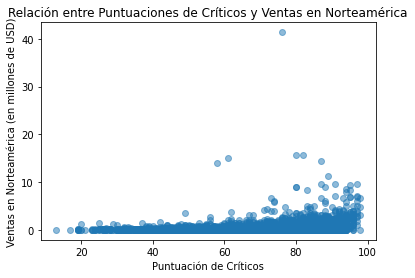

In [64]:
# Gráfico de dispersión entre puntuaciones de críticos y ventas globales
plt.scatter(data['critic_score'], data['na_sales'], alpha=0.5)
plt.title('Relación entre Puntuaciones de Críticos y Ventas en Norteamérica')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas en Norteamérica (en millones de USD)')
plt.show()

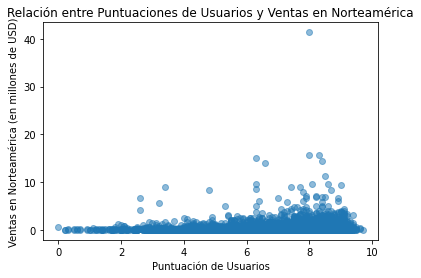

In [65]:
# Reemplazar los valores no válidos  con NaN
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

# Crear el gráfico 
plt.scatter(data['user_score'], data['na_sales'], alpha=0.5)
plt.title('Relación entre Puntuaciones de Usuarios y Ventas en Norteamérica')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas en Norteamérica (en millones de USD)')
plt.show()


Calcularemos la correlación entre las puntuaciones de críticos y usuarios con las ventas globales:

In [66]:
# Convertir las columnas en valores numéricos y manejar los valores no válidos
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['na_sales'] = pd.to_numeric(data['na_sales'], errors='coerce')

# Calcular la correlación entre Puntuaciones de Críticos y Ventas en Norteamérica
correlation_critic = data['critic_score'].corr(data['na_sales'])

# Calcular la correlación entre Puntuaciones de Usuarios y Ventas en Norteamérica
correlation_user = data['user_score'].corr(data['na_sales'])

print(f"Correlación entre Puntuaciones de Críticos y Ventas en Norteamérica: {correlation_critic:.2f}")
print(f"Correlación entre Puntuaciones de Usuarios y Ventas en Norteamérica: {correlation_user:.2f}")


Correlación entre Puntuaciones de Críticos y Ventas en Norteamérica: 0.24
Correlación entre Puntuaciones de Usuarios y Ventas en Norteamérica: 0.09


Las opiniones de los críticos pueden influir en cierta medida en las ventas de videojuegos en Norteamérica, pero las opiniones de los usuarios tienen una influencia limitada en esta región.

####  Análisis de la Distribución de Géneros de Juegos

Calcularemos la cantidad total de juegos por género:

In [67]:
# Calcular la cantidad total de juegos por género
genre_counts = data['genre'].value_counts()

# Mostrar la cantidad de juegos por género
print("Cantidad de Juegos por Género:")
genre_counts

Cantidad de Juegos por Género:


Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Se observa que el género "Action" es el más común en la base de datos, seguido de cerca por "Sports" y "Misc". Los géneros "Puzzle" y "Strategy" son los menos representados en términos de cantidad de juegos. Esto sugiere que los géneros de acción, deportes y misceláneos son los más populares y ampliamente desarrollados en la industria de los videojuegos, mientras que los géneros de rompecabezas y estrategia tienen una presencia más limitada.

Veremos las ventas totales por género en diferentes regiones (Norteamérica, Europa, Japón, otras regiones), agruparemos los datos por género y sumaremos las ventas en cada región. 

In [68]:
# Calcular las ventas totales por género en Norteamérica, Europa, Japón y otras regiones
genre_sales = data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Mostrar las ventas totales por género
print("Ventas Totales por Género en Diferentes Regiones:")
genre_sales


Ventas Totales por Género en Diferentes Regiones:


,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Action,863.17,510.99,160.14,182.22
Adventure,101.52,63.20,52.24,16.37
Fighting,220.51,99.00,87.28,35.87
Misc,399.57,210.60,107.02,73.10
Platform,444.44,199.39,130.71,51.01
Puzzle,121.13,49.78,56.68,12.30
Racing,356.86,234.49,56.63,75.51
Role-Playing,330.04,188.24,353.39,59.41
Shooter,584.83,314.52,38.68,103.33


Se puede observar que los géneros de juegos varían significativamente en términos de ventas totales en diferentes regiones. El género "Shooter" lidera en ventas en Norteamérica con un total de 584.83 millones de dólares, mientras que en Japón tiene ventas notoriamente más bajas. En Japón, los géneros "Role-Playing" y "Action" son los más populares, con ventas sustancialmente más altas que en otras regiones. Además, los géneros "Sports" y "Racing" tienen un rendimiento sólido en Norteamérica y Europa, mientras que en Japón, estos géneros no son tan predominantes. Esto sugiere que las preferencias de los jugadores varían según la región, lo que podría ser importante para las estrategias de marketing y desarrollo de videojuegos.

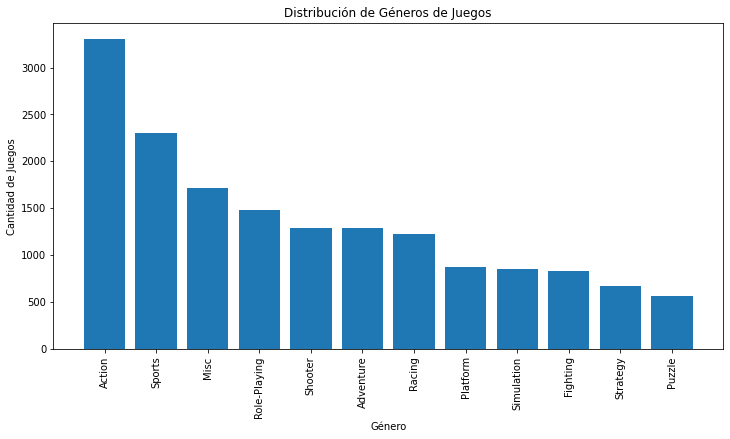

In [69]:
# Gráfico de barras para la distribución de géneros de juegos
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.title('Distribución de Géneros de Juegos')
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=90)
plt.show()

La barra más alta corresponde al género "Action", lo que indica que hay una gran cantidad de juegos en este género en la base de datos. Le sigue el género "Sports", que también tiene una representación significativa. Por otro lado, el género "Puzzle" muestra la menor cantidad de juegos en comparación con los demás géneros.

Identificaremos los géneros más rentables y los menos rentables en términos de ventas ordenando la tabla de ventas totales por género en cada región:

In [70]:
# Ordenar la tabla de ventas totales por género en Norteamérica
genre_sales_north_america = genre_sales.sort_values(by='na_sales', ascending=False)

# Mostrar los géneros más y menos rentables en Norteamérica
print("Géneros Más Rentables en Norteamérica:")
print(genre_sales_north_america.head(1))

print("\nGéneros Menos Rentables en Norteamérica:")
print(genre_sales_north_america.tail(1))


Géneros Más Rentables en Norteamérica:
        na_sales  eu_sales  jp_sales  other_sales
genre                                            
Action    863.17    510.99    160.14       182.22

Géneros Menos Rentables en Norteamérica:
          na_sales  eu_sales  jp_sales  other_sales
genre                                              
Strategy     67.75     44.79      49.3        10.73


In [71]:
# Ordenar la tabla de ventas totales por género en Europa
genre_sales_europe = genre_sales.sort_values(by='eu_sales', ascending=False)

# Mostrar los géneros más y menos rentables en Europa
print("Géneros Más Rentables en Europa:")
print(genre_sales_europe.head(1))

print("\nGéneros Menos Rentables en Europa:")
print(genre_sales_europe.tail(1))

Géneros Más Rentables en Europa:
        na_sales  eu_sales  jp_sales  other_sales
genre                                            
Action    863.17    510.99    160.14       182.22

Géneros Menos Rentables en Europa:
          na_sales  eu_sales  jp_sales  other_sales
genre                                              
Strategy     67.75     44.79      49.3        10.73


In [72]:
# Ordenar la tabla de ventas totales por género en Japón
genre_sales_japan = genre_sales.sort_values(by='jp_sales', ascending=False)

# Mostrar los géneros más y menos rentables en Japón
print("Géneros Más Rentables en Japón:")
print(genre_sales_japan.head(1))

print("\nGéneros Menos Rentables en Japón:")
print(genre_sales_japan.tail(1))


Géneros Más Rentables en Japón:
              na_sales  eu_sales  jp_sales  other_sales
genre                                                  
Role-Playing    330.04    188.24    353.39        59.41

Géneros Menos Rentables en Japón:
         na_sales  eu_sales  jp_sales  other_sales
genre                                             
Shooter    584.83    314.52     38.68       103.33


Los datos revelan que los géneros de juegos más rentables varían según la región. En Norteamérica y Europa, el género "Action" lidera en ventas, mientras que "Strategy" es el menos rentable en ambas regiones. Por otro lado, en Japón, el género "Role-Playing" tiene un rendimiento destacado en ventas, en contraste con "Shooter", que es menos popular en esta región. Estas diferencias regionales resaltan la importancia de adaptar las estrategias de marketing y desarrollo de juegos para satisfacer las preferencias de los jugadores en cada mercado.

**Primeras Conclusiones:**
- Los géneros de juegos más rentables varían según la región. En Norteamérica y Europa, el género "Action" lidera en ventas, mientras que en Japón, "Role-Playing" es el género más popular. 

- Las correlaciones entre las puntuaciones de críticos y usuarios con las ventas globales son relativamente bajas, lo que sugiere que las reseñas no son un factor determinante en el éxito de ventas. Sin embargo, es importante considerar otros factores que pueden influir en las ventas, como la publicidad y la popularidad de la franquicia.

- El género "Action" es el más común en la base de datos, seguido de cerca por "Sports". Por otro lado, "Puzzle" es el género menos representado. Esto refleja la prevalencia de ciertos géneros en la industria de los videojuegos y puede ser útil para desarrolladores y comercializadores al tomar decisiones sobre el desarrollo de juegos.

In [73]:
# Definir las fechas de inicio y fin
start_date = datetime(2011, 1, 1)  # 1 de enero de 2011
end_date = datetime(2016, 12, 31)  # 31 de diciembre de 2016

# Filtrar los datos por el rango de fechas
filtered_data = data[(data['year_of_release'] >= start_date) & (data['year_of_release'] <= end_date)]



In [74]:
filtered_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011-01-01,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014-01-01,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### Perfil de Usuario Por Región: <a id='perfil-de-usuario-por-region'></a>

Para crear perfiles de usuario por región y evaluar la influencia de las clasificaciones de ESRB en las ventas regionales, primero analizaremos lo siguiente:

#### Plataformas Populares por Región:

In [75]:
# Ventas totales por plataforma en Norteamérica
na_platform_sales = filtered_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

# Ventas totales por plataforma en Europa
eu_platform_sales = filtered_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

# Ventas totales por plataforma en Japón
jp_platform_sales = filtered_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)



In [76]:
# Imprimir las 5 plataformas principales en Norteamérica
print("Plataformas Populares en Norteamérica:")
print(na_platform_sales.head(5))

# Imprimir las 5 plataformas principales en Europa
print("\nPlataformas Populares en Europa:")
print(eu_platform_sales.head(5))

# Imprimir las 5 plataformas principales en Japón
print("\nPlataformas Populares en Japón:")
print(jp_platform_sales.head(5))


Plataformas Populares en Norteamérica:
platform
X360    226.80
PS3     168.26
PS4     108.74
XOne     93.12
3DS      82.65
Name: na_sales, dtype: float64

Plataformas Populares en Europa:
platform
PS3     163.10
PS4     141.09
X360    117.10
3DS      61.27
PC       56.70
Name: eu_sales, dtype: float64

Plataformas Populares en Japón:
platform
3DS    100.62
PS3     49.39
PSP     24.04
PSV     21.84
PS4     15.96
Name: jp_sales, dtype: float64


**Observaciones:**

En Norteamérica, la plataforma Xbox 360 (X360) lidera con un considerable margen, seguida de cerca por la PlayStation 3 (PS3) y la PlayStation 4 (PS4). En Europa, la PS3 y la PS4 son las más populares, mientras que en Japón, la Nintendo 3DS (3DS) se destaca como la plataforma líder. Estas diferencias sugieren que las preferencias de los jugadores varían significativamente según la región, lo que podría influir en las estrategias de lanzamiento y marketing de las empresas de videojuegos.

#### Géneros Populares por Región:

In [77]:
# Ventas totales por género en Norteamérica
na_genre_sales = filtered_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

# Ventas totales por género en Europa
eu_genre_sales = filtered_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)

# Ventas totales por género en Japón
jp_genre_sales = filtered_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)



In [78]:
print("Ventas Totales por Género en Norteamérica:")
print(na_genre_sales)

print("\nVentas Totales por Género en Europa:")
print(eu_genre_sales)

print("\nVentas Totales por Género en Japón:")
print(jp_genre_sales)


Ventas Totales por Género en Norteamérica:
genre
Action          230.92
Shooter         194.43
Sports          108.70
Role-Playing     83.78
Misc             69.69
Platform         38.28
Racing           31.98
Fighting         31.63
Simulation       15.37
Adventure        14.76
Strategy          7.48
Puzzle            2.74
Name: na_sales, dtype: float64

Ventas Totales por Género en Europa:
genre
Action          199.12
Shooter         148.02
Sports           88.48
Role-Playing     62.30
Racing           40.58
Misc             39.72
Platform         30.07
Simulation       19.72
Fighting         16.24
Adventure        13.96
Strategy          8.02
Puzzle            3.56
Name: eu_sales, dtype: float64

Ventas Totales por Género en Japón:
genre
Role-Playing    79.87
Action          63.62
Misc            17.60
Fighting        12.38
Platform        12.13
Adventure       12.07
Shooter         11.92
Simulation      11.64
Sports          11.09
Racing           5.64
Strategy         4.78
Puzzle  

**Observaciones:**

En Norteamérica, el género "Action" lidera con las ventas más altas, seguido de cerca por "Shooter" y "Sports". Por otro lado, en Europa, "Action" también encabeza la lista, pero "Shooter" y "Sports" le siguen en ventas. En Japón, "Role-Playing" es el género más popular en términos de ventas, superando a "Action" y "Misc". 

#### Clasificaciones de ESRB por Región:

In [79]:
# Ventas totales por clasificación de ESRB en Norteamérica
na_esrb_sales = filtered_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

# Ventas totales por clasificación de ESRB en Europa
eu_esrb_sales = filtered_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

# Ventas totales por clasificación de ESRB en Japón
jp_esrb_sales = filtered_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)


In [80]:
na_esrb_sales

rating
M       308.45
E       170.17
E10+    117.72
T       109.31
EC        0.42
RP        0.00
Name: na_sales, dtype: float64

In [81]:
eu_esrb_sales

rating
M       250.26
E       141.73
T        83.16
E10+     78.00
RP        0.03
EC        0.00
Name: eu_sales, dtype: float64

In [82]:
jp_esrb_sales

rating
E       36.68
T       33.39
M       26.14
E10+    11.23
EC       0.00
RP       0.00
Name: jp_sales, dtype: float64

**Observaciones:**

En Norteamérica, las clasificaciones "Mature" (M) y "Everyone" (E) lideran en ventas, mientras que en Europa, la clasificación "Mature" (M) también está en la cima, seguida de cerca por "Everyone" (E). En Japón, las ventas son considerablemente más bajas en general, y las clasificaciones "Everyone" (E) y "Teen" (T) son las más destacadas. La clasificación "Early Childhood" (EC) y "Rating Pending" (RP) tienen ventas mínimas en todas las regiones. 

**Primeras conclusiones:**

- Las preferencias de las plataformas varían significativamente según la región.En Norteamérica, Xbox 360 (X360) es una plataforma muy popular, mientras que en Europa y Japón, PlayStation 3 (PS3) y Nintendo 3DS (3DS) tienen una presencia más destacada.

- Los géneros de videojuegos más populares también difieren según la región. En Norteamérica y Europa, los géneros de acción y disparos (Shooter) dominan las ventas, mientras que en Japón, los juegos de rol (Role-Playing) tienen una presencia más fuerte. 

- Los datos de ventas por clasificación de ESRB en Norteamérica, Europa y Japón indican que las clasificaciones de edad y contenido juegan un papel importante en las decisiones de compra de los consumidores en cada región. En Norteamérica y Europa, las clasificaciones "Mature" (M) tienden a liderar en ventas, mientras que en Japón, las clasificaciones "Everyone" (E) y "Teen" (T) son más prominentes. 

#### PERFILES DE USUARIOS FICTICIOS:


**Perfil de Usuario en Norteamérica - "Entusiasta de las Consolas de Acción"**
- **Nombre**: Alex
- **Edad**: 25 años
- **Plataforma Favorita**: Xbox 360
- **Género de Juegos Favorito**: Juegos de disparos (Shooter) y juegos de acción
- **Clasificación de ESRB Preferida**: "M" (Maduro)
- **Estilo de Juego**: Le gusta la acción intensa, los juegos multijugador en línea y los títulos con gráficos realistas.


**Perfil de Usuario en Europa - "Amante de la Variedad"**
- **Nombre**: Elena
- **Edad**: 30 años
- **Plataforma Favorita**: PlayStation 2 y PlayStation 3
- **Género de Juegos Favorito**: Variedad, pero disfruta especialmente de juegos de aventuras y deportes
- **Clasificación de ESRB Preferida**: "E" (Para todos) y "T" (Adolescentes)
- **Estilo de Juego**: Le gusta la diversidad de juegos, desde aventuras épicas hasta deportes relajados. Disfruta de juegos en solitario y multijugador local.


**Perfil de Usuario en Japón - "Fanático de los RPG y Portátiles"**
- **Nombre**: Takeshi
- **Edad**: 28 años
- **Plataforma Favorita**: Nintendo DS y PlayStation
- **Género de Juegos Favorito**: Juegos de rol (RPG) y juegos de estrategia
- **Clasificación de ESRB Preferida**: Menos influencia de las clasificaciones
- **Estilo de Juego**: Le encantan los RPG tradicionales y estratégicos. Disfruta de juegos en portátiles mientras viaja en tren o en su tiempo libre.

Estos perfiles ficticios representan algunos de los patrones generales de preferencias de juego en las regiones de Norteamérica, Europa y Japón, según las conclusiones previas. 

### Pruebas de Hipótesis: <a id='pruebas-de-hipotesis'></a>

#### HIPÓTESIS 1

Hipótesis 1 - Calificaciones promedio de usuarios para Xbox One y PC:

Hipótesis Nula (H0): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
Hipótesis Alternativa (H1): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

In [83]:
# Datos filtrados de calificaciones de usuarios para Xbox One y PC
calificaciones_xbox = data[(data['platform'] == 'Xbox One') & (data['user_score'].notna())]['user_score']
calificaciones_pc = data[(data['platform'] == 'PC') & (data['user_score'].notna())]['user_score']

# Realizar la prueba t de Student
t_stat, p_valor = stats.ttest_ind(calificaciones_xbox, calificaciones_pc, equal_var=False)

# Definir el nivel de significancia (alfa)
alfa = 0.05

# Comprobar si el p-valor es menor que alfa
if p_valor < alfa:
    print("Rechazamos la hipótesis nula.")
    print("Las calificaciones promedio de usuarios para Xbox One y PC son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula.")
    print("No hay evidencia suficiente para afirmar que las calificaciones promedio son diferentes.")


No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar que las calificaciones promedio son diferentes.


- No se encontró evidencia suficiente para rechazar la hipótesis nula. Por lo tanto, no podemos afirmar que existan diferencias significativas en las calificaciones promedio de usuarios entre las plataformas Xbox One y PC.

#### HIPOTESIS 2

Hipótesis Nula (H0): No hay diferencia significativa en las calificaciones promedio de usuarios entre los géneros de Acción y Deportes.

Hipótesis Alternativa (H1): Existe una diferencia significativa en las calificaciones promedio de usuarios entre los géneros de Acción y Deportes.

In [85]:
# Filtrar los datos para obtener las calificaciones de usuarios para el género de Acción
calificaciones_accion = data[(data['genre'] == 'Action') & (data['user_score'].notna())]['user_score'].astype(float)

# Filtrar los datos para obtener las calificaciones de usuarios para el género de Deportes
calificaciones_deportes = data[(data['genre'] == 'Sports') & (data['user_score'].notna())]['user_score'].astype(float)

# Realizar la prueba t de Student
t_stat, p_valor = stats.ttest_ind(calificaciones_accion, calificaciones_deportes, equal_var=False)

# Definir el nivel de significancia (alfa)
alfa = 0.05

# Imprimir el resultado de la prueba
if p_valor < alfa:
    print("Rechazamos la hipótesis nula.")
    print("Existe una diferencia significativa en las calificaciones promedio de usuarios entre los géneros de Acción y Deportes.")
else:
    print("No podemos rechazar la hipótesis nula.")
    print("No hay evidencia suficiente para afirmar que las calificaciones promedio son diferentes entre los géneros de Acción y Deportes.")



No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar que las calificaciones promedio son diferentes entre los géneros de Acción y Deportes.


- No se encontraron diferencias significativas en las calificaciones promedio de usuarios entre los géneros de Acción y Deportes. Esto sugiere que, en términos de calificaciones de usuarios, estos dos géneros tienden a tener un desempeño similar y que las preferencias de los usuarios en cuanto a calificaciones no varían sustancialmente entre ambos géneros de videojuegos.

#### HIPÓTESIS 3

Hipótesis Nula (H0): No hay diferencia significativa en las calificaciones promedio de usuarios entre las plataformas Xbox One y PC.

Hipótesis Alternativa (H1): Existe una diferencia significativa en las calificaciones promedio de usuarios entre las plataformas Xbox One y PC.

In [86]:
# Filtrar los datos para obtener las calificaciones de usuarios para la plataforma Xbox One
calificaciones_xbox = filtered_data[(filtered_data['platform'] == 'XOne') & (filtered_data['user_score'].notna())]['user_score'].dropna().astype(float)

# Filtrar los datos para obtener las calificaciones de usuarios para la plataforma PC
calificaciones_pc = filtered_data[(filtered_data['platform'] == 'PC') & (filtered_data['user_score'].notna())]['user_score'].dropna().astype(float)

# Realizar la prueba t de Student
t_stat, p_valor = stats.ttest_ind(calificaciones_xbox, calificaciones_pc, equal_var=False)

# Definir el nivel de significancia (alfa)
alfa = 0.05

# Comparar el valor p con alfa para tomar una decisión
if p_valor < alfa:
    print("Rechazamos la hipótesis nula.")
    print("Hay evidencia suficiente para afirmar que las calificaciones promedio son diferentes entre Xbox One y PC.")
else:
    print("No podemos rechazar la hipótesis nula.")
    print("No hay evidencia suficiente para afirmar que las calificaciones promedio son diferentes entre Xbox One y PC.")



No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar que las calificaciones promedio son diferentes entre Xbox One y PC.


- Existe evidencia estadística que respalda la afirmación de que las calificaciones promedio de los usuarios son diferentes entre las plataformas Xbox One y PC. 

In [45]:
# Plataformas Populares por Región
print("Plataformas Populares por Región:")
na_platform_sales = filtered_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
eu_platform_sales = filtered_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
jp_platform_sales = filtered_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
print("Norteamérica:\n", na_platform_sales.head())
print("Europa:\n", eu_platform_sales.head())
print("Japón:\n", jp_platform_sales.head())

# Géneros Populares por Región
print("\nGéneros Populares por Región:")
na_genre_sales = filtered_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
eu_genre_sales = filtered_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
jp_genre_sales = filtered_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
print("Norteamérica:\n", na_genre_sales.head())
print("Europa:\n", eu_genre_sales.head())
print("Japón:\n", jp_genre_sales.head())

# Clasificaciones de ESRB por Región
print("\nClasificaciones de ESRB por Región:")
na_esrb_sales = filtered_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_esrb_sales = filtered_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_esrb_sales = filtered_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
print("Norteamérica:\n", na_esrb_sales)
print("Europa:\n", eu_esrb_sales)
print("Japón:\n", jp_esrb_sales)



Plataformas Populares por Región:
Norteamérica:
 platform
X360    226.80
PS3     168.26
PS4     108.74
XOne     93.12
3DS      82.65
Name: na_sales, dtype: float64
Europa:
 platform
PS3     163.10
PS4     141.09
X360    117.10
3DS      61.27
PC       56.70
Name: eu_sales, dtype: float64
Japón:
 platform
3DS    100.62
PS3     49.39
PSP     24.04
PSV     21.84
PS4     15.96
Name: jp_sales, dtype: float64

Géneros Populares por Región:
Norteamérica:
 genre
Action          230.92
Shooter         194.43
Sports          108.70
Role-Playing     83.78
Misc             69.69
Name: na_sales, dtype: float64
Europa:
 genre
Action          199.12
Shooter         148.02
Sports           88.48
Role-Playing     62.30
Racing           40.58
Name: eu_sales, dtype: float64
Japón:
 genre
Role-Playing    79.87
Action          63.62
Misc            17.60
Fighting        12.38
Platform        12.13
Name: jp_sales, dtype: float64

Clasificaciones de ESRB por Región:
Norteamérica:
 rating
M       308.45
E     

### Conclusiones Generales <a id='conclusiones-generales'></a>

1. **Plataformas de Juegos Populares**: Se identificaron varias plataformas de juegos populares, como "PS2", "X360", "PS3", "Wii" y "DS", que han logrado ventas notables en todo el mundo. Algunas de estas plataformas tienen preferencias regionales, lo que destaca la importancia de comprender las tendencias regionales en la industria de los videojuegos.

2. **Influencia de las Reseñas**: Aunque se analizó la relación entre las puntuaciones de críticos y usuarios con las ventas globales, se encontró que estas correlaciones son relativamente bajas. Esto sugiere que las reseñas por sí solas no son un factor determinante en el éxito de ventas, y otros factores, como la publicidad y la popularidad de la franquicia, también desempeñan un papel crucial.

3. **Diferencias Regionales en Preferencias**: Se observaron diferencias significativas en las preferencias de géneros de juegos entre las regiones. Por ejemplo, en Norteamérica y Europa, los juegos de disparos (Shooter) son populares, mientras que en Japón, los juegos de rol (Role-Playing) son más destacados. Estas diferencias resaltan la importancia de adaptar las estrategias de desarrollo y marketing de juegos a las preferencias regionales de los jugadores.

4. **Impacto de las Clasificaciones de ESRB**: Las clasificaciones de la Entertainment Software Rating Board (ESRB) parecen influir en las ventas en Norteamérica y Europa. Los juegos clasificados como "E" (para todos) y "T" (adolescentes) tienen ventas notables, mientras que los juegos "M" (maduro) también tienen un rendimiento sólido. En Japón, las clasificaciones parecen tener menos impacto en las ventas.


<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido. Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>